In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
q = (
      [
       [0, "['a', 'b', 'c']", 9004],
       [1, "['a', 'b', 'd']", 1258],
       [2, "['a', 'b', 'e']", 175],
       [3, "['a', 'b', 'f']", 5257],
       [4, "['a', 'c', 'd']", 619],
       [5, "['a', 'c', 'e']", 9004],
       [6, "['a', 'c', 'f']", 1006],
       [7, "['a', 'd', 'e']", 9004],
       [8, "['a', 'd', 'f']", 2004],
       [9, "['a', 'e', 'f']", 1258],
       [10, "['c', 'b', 'e']", 9004],
       [11, "['c', 'b', 'd']", 5257],
       [12, "['c', 'b', 'f']", 1006],
       [13, "['d', 'b', 'e']", 2004],
       [14, "['d', 'b', 'f']", 619],
       [15, "['e', 'b', 'f']", 5257],
       [16, "['d', 'b', 'e']", 1006],
       [17, "['d', 'b', 'f']", 1258],
       [18, "['d', 'e', 'f']", 2004],
       [19, "['c', 'e', 'f']", 1258],
       [20, "['c', 'd', 'f']", 175],
       [21, "['c', 'b', 'a']", 1175],
      ]
    )

In [ ]:
l = pd.DataFrame(q, columns=['Index','Words','Freq'])
l

,Index,Words,Freq
0,0,"['a', 'b', 'c']",9004
1,1,"['a', 'b', 'd']",1258
2,2,"['a', 'b', 'e']",175
3,3,"['a', 'b', 'f']",5257
4,4,"['a', 'c', 'd']",619
5,5,"['a', 'c', 'e']",9004
6,6,"['a', 'c', 'f']",1006
7,7,"['a', 'd', 'e']",9004
8,8,"['a', 'd', 'f']",2004
9,9,"['a', 'e', 'f']",1258


In [ ]:
l = l.drop('Index', axis=1)
l['Words'] = l['Words'].map(lambda x: re.sub(r"'", '', x))
l['Words'] = l['Words'].map(lambda x: re.sub(r" ", '', x))
l.Freq = scaler.fit_transform(l[['Freq']])
l.Freq = abs(l.Freq)
l['Words'] = l['Words'].str.replace('[', '')
l['Words'] = l['Words'].str.replace(']', '')
l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Words,Freq
0,"a,b,c",1.874613
1,"a,b,d",0.592690
2,"a,b,e",0.937654
3,"a,b,f",0.681096
4,"a,c,d",0.796228
5,"a,c,e",1.874613
6,"a,c,f",0.672959
7,"a,d,e",1.874613
8,"a,d,f",0.355070
9,"a,e,f",0.592690


In [ ]:
data = pd.DataFrame(l.Words.str.split(',',2).tolist(), columns = ['Word1','Word2','Word3'])
data['Freq'] = l.Freq
data

,Word1,Word2,Word3,Freq
0,a,b,c,1.874613
1,a,b,d,0.592690
2,a,b,e,0.937654
3,a,b,f,0.681096
4,a,c,d,0.796228
5,a,c,e,1.874613
6,a,c,f,0.672959
7,a,d,e,1.874613
8,a,d,f,0.355070
9,a,e,f,0.592690


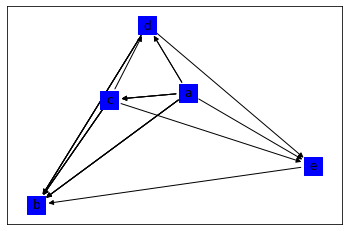

In [ ]:
G = nx.from_pandas_edgelist(data, 'Word1', 'Word2', edge_key= 'Freq', create_using=nx.MultiDiGraph())
nx.draw_networkx(G, arrows = True, node_shape = 's', node_color = 'blue')

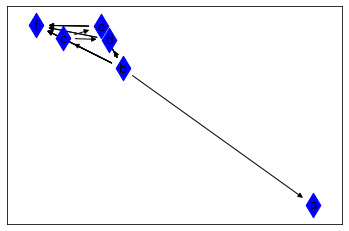

In [ ]:
F = nx.from_pandas_edgelist(data, 'Word2', 'Word3', edge_key= 'Freq', create_using=nx.MultiDiGraph())
nx.draw_networkx(F, arrows = True, node_shape = 'd', node_color = 'blue')

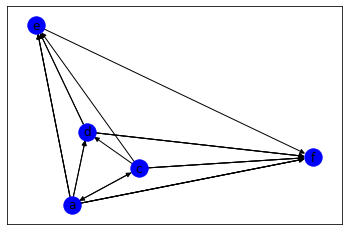

In [ ]:
H = nx.from_pandas_edgelist(data, 'Word1', 'Word3', edge_key= 'Freq', create_using=nx.MultiDiGraph())
nx.draw_networkx(H, arrows = True, node_color = 'blue')

In [ ]:
list_of_Graph = [G,F,H]

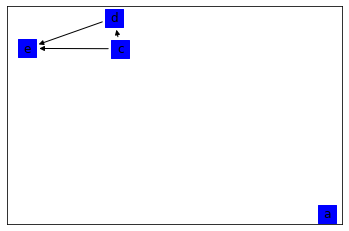

In [ ]:
X = nx.intersection_all(list_of_Graph)
nx.draw_networkx(X, arrows = True, node_shape = 's', node_color = 'blue')

In [ ]:
f = plt.figure()
f.set_figwidth(250)
f.set_figheight(250)

<Figure size 18000x18000 with 0 Axes>

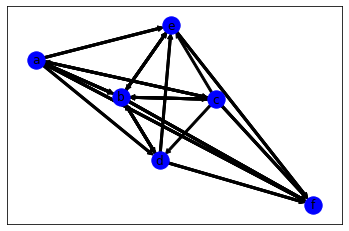

In [ ]:
E = nx.MultiDiGraph()
E = nx.compose_all(list_of_Graph)
# pos = nx.spring_layout(E)
# nx.draw(E, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx(E, arrows = True, node_color = 'blue',arrowstyle='simple')
plt.savefig('fig.png')

In [ ]:
E.degree(weight='weight')

DiMultiDegreeView({'a': 18, 'b': 26, 'c': 14, 'd': 14, 'e': 14, 'f': 18})

In [ ]:
# nx.write_gpickle(E,"test.gpickle")

In [ ]:
# nx.write_multiline_adjlist(E,"test.adjlist")

In [ ]:
nx.write_gexf(E, "geeksforgeeks.gexf")